# Are people a good judge of their own sleep and health?
***
## Initial Impressions of the Time Americans Spend Sleeping Dataset

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:

tass_df = pd.read_csv('../data_file/cleaned_data_csv/tass_df.csv')


In [3]:
tass_df.drop(['Unnamed: 0'] , axis = 1, inplace = True)

In [4]:
tass_df.drop(['Period'] , axis = 1, inplace = True)
tass_df.drop(['activity'] , axis = 1, inplace = True)
tass_df.drop(['Standard Error'], axis=1, inplace=True)

In [5]:
tass_df.avg_hrs_day_sleeping = tass_df.avg_hrs_day_sleeping.astype(float)

tass_df.age_group = tass_df.age_group.astype('string')
tass_df.sex = tass_df.sex.astype('string')
tass_df.type_of_days = tass_df.type_of_days.astype('string')
tass_df.dtypes

Year                      int64
avg_hrs_day_sleeping    float64
type_of_days             string
age_group                string
sex                      string
dtype: object

In [6]:
tass_df

,Year,avg_hrs_day_sleeping,type_of_days,age_group,sex
0,2003,8.57,All days,15 years and over,Both
1,2004,8.55,All days,15 years and over,Both
2,2005,8.62,All days,15 years and over,Both
3,2006,8.63,All days,15 years and over,Both
4,2007,8.57,All days,15 years and over,Both
...,...,...,...,...,...
940,2013,8.83,Nonholiday weekdays,65 years and over,Women
941,2014,8.98,Nonholiday weekdays,65 years and over,Women
942,2015,8.83,Nonholiday weekdays,65 years and over,Women
943,2016,8.92,Nonholiday weekdays,65 years and over,Women


## Hours Slept by Various Age Groups

In [7]:
# Create a scatter plot using seaborn for avg_hrs_day_sleeping vs Year with multiple lines for age_group

In [8]:
age_variety_df = tass_df[tass_df['age_group'] != '15 years and over']
age_variety_df = age_variety_df[age_variety_df['sex'] == 'Both']
age_variety_df = age_variety_df[age_variety_df['type_of_days'] == 'All days']
age_group_sleeping = age_variety_df.groupby(['age_group','Year'])['avg_hrs_day_sleeping'].mean().unstack()

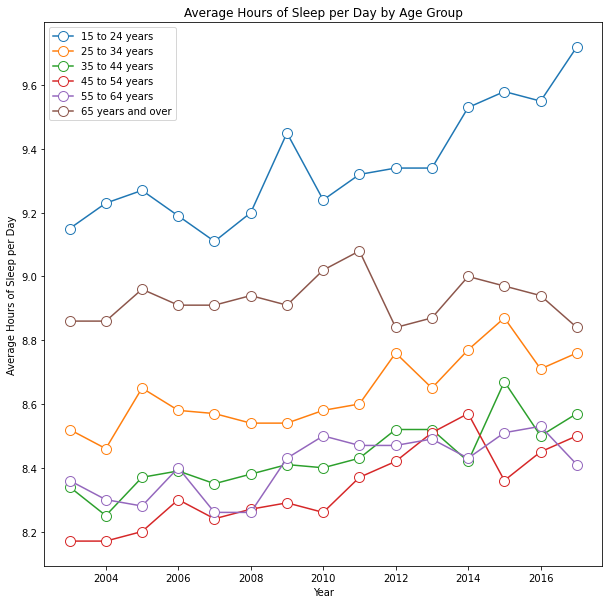

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
age_group_sleeping.T.plot(ax=ax, marker='o', markersize=10, markerfacecolor='w')
ax.set_ylabel('Average Hours of Sleep per Day')
ax.set_title('Average Hours of Sleep per Day by Age Group')
ax.legend()

## Hours Slept by Various Day Configurations

In [10]:
day_config_variety_df = tass_df[tass_df['type_of_days'] != 'All days']
day_config_variety_df = day_config_variety_df[day_config_variety_df['sex'] == 'Both']
day_config_variety_df = day_config_variety_df[day_config_variety_df['age_group'] == '15 years and over']
day_config_variety_df = day_config_variety_df.groupby(['type_of_days','Year'])['avg_hrs_day_sleeping'].mean().unstack()

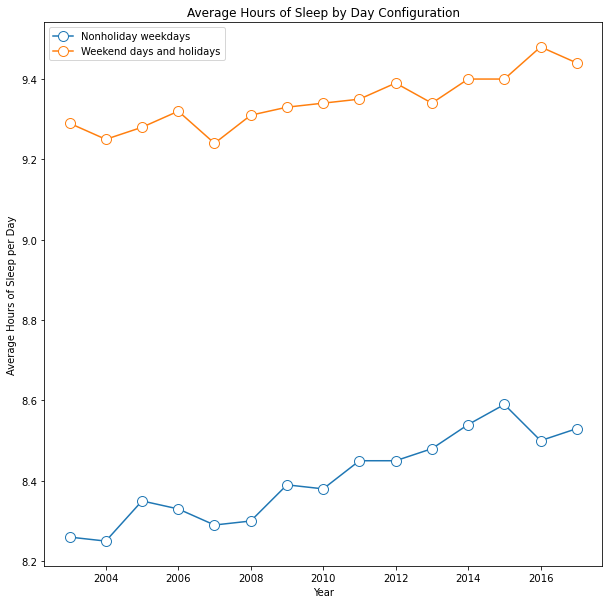

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
day_config_variety_df.T.plot(ax=ax, marker='o', markersize=10, markerfacecolor='w')
ax.set_ylabel('Average Hours of Sleep per Day')
ax.set_title('Average Hours of Sleep by Day Configuration')
ax.legend()

## Hours Slept by Gender

In [12]:
gender_variety_df = tass_df[tass_df['age_group'] != '15 years and over']
gender_variety_df = gender_variety_df[gender_variety_df['sex'] != 'Both']
gender_variety_df = gender_variety_df[gender_variety_df['type_of_days'] == 'All days']
gender_variety_df = gender_variety_df.groupby(['sex', 'age_group','Year'])['avg_hrs_day_sleeping'].mean().unstack()

In [13]:
gender_variety_df.loc['Men']

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
age_group,,,,,,,,,,,,,,,
15 to 24 years,9.14,9.12,9.20,9.21,9.03,9.27,9.56,9.21,9.33,9.16,9.30,9.47,9.51,9.59,9.78
25 to 34 years,8.30,8.42,8.44,8.40,8.45,8.48,8.48,8.28,8.37,8.55,8.45,8.62,8.79,8.54,8.47
35 to 44 years,8.20,8.20,8.36,8.28,8.28,8.31,8.28,8.29,8.35,8.33,8.37,8.19,8.67,8.41,8.36
45 to 54 years,8.08,8.11,8.03,8.20,8.18,8.16,8.17,8.15,8.23,8.38,8.40,8.46,8.22,8.17,8.47
55 to 64 years,8.32,8.30,8.20,8.32,8.32,8.24,8.37,8.51,8.40,8.31,8.52,8.35,8.38,8.45,8.30
65 years and over,8.89,8.76,8.98,9.03,8.91,8.95,8.83,9.00,9.05,8.81,8.83,8.96,8.97,8.90,8.75


In [14]:
gender_variety_df.loc['Women']

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
age_group,,,,,,,,,,,,,,,
15 to 24 years,9.16,9.34,9.35,9.17,9.20,9.13,9.33,9.27,9.31,9.53,9.38,9.60,9.64,9.50,9.66
25 to 34 years,8.73,8.51,8.85,8.75,8.69,8.60,8.61,8.89,8.83,8.97,8.85,8.91,8.96,8.87,9.04
35 to 44 years,8.48,8.30,8.38,8.49,8.41,8.44,8.53,8.50,8.51,8.69,8.67,8.63,8.68,8.58,8.77
45 to 54 years,8.26,8.23,8.36,8.40,8.29,8.39,8.42,8.36,8.51,8.46,8.61,8.68,8.49,8.71,8.52
55 to 64 years,8.39,8.30,8.35,8.47,8.20,8.29,8.49,8.49,8.54,8.61,8.46,8.51,8.63,8.61,8.51
65 years and over,8.84,8.93,8.95,8.82,8.91,8.94,8.96,9.04,9.09,8.87,8.90,9.02,8.97,8.97,8.91


In [15]:
gender_variety_df.loc['Men'].T.columns

Index(['15 to 24 years', '25 to 34 years', '35 to 44 years', '45 to 54 years',
       '55 to 64 years', '65 years and over'],
      dtype='object', name='age_group')

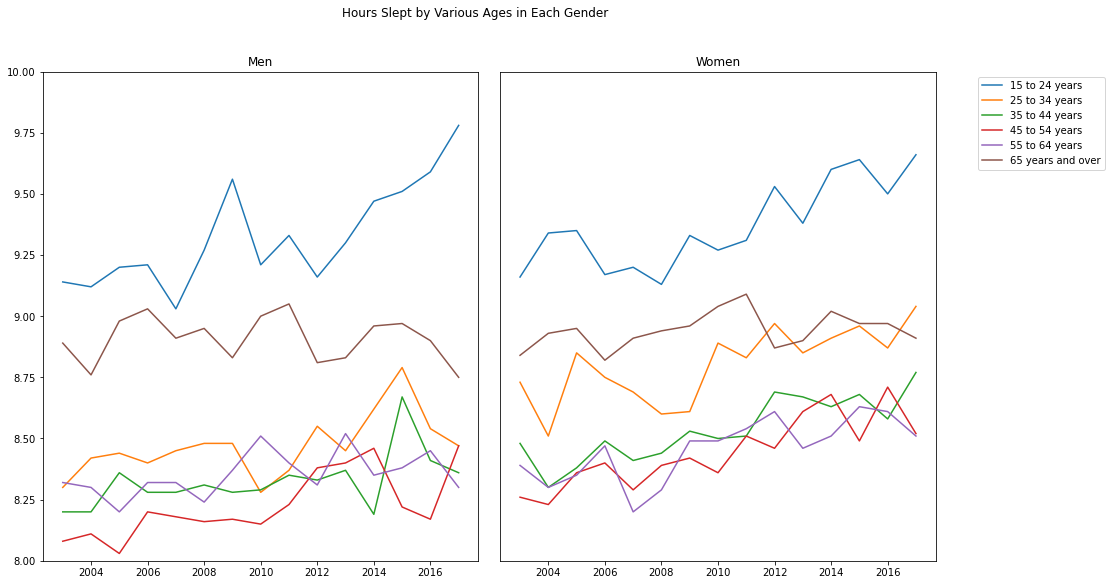

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))
fig.suptitle('Hours Slept by Various Ages in Each Gender')
ax1.plot(gender_variety_df.loc['Men'].T)
ax2.plot(gender_variety_df.loc['Women'].T)
ax1.set_ylim(8,10)
ax1.set_title('Men')
ax2.set_title('Women')
ax2.set_ylim(8,10)
ax2.set_yticklabels([])
ax2.set_yticks([])
plt.legend(gender_variety_df.loc['Men'].T.columns.tolist(), bbox_to_anchor=(1.4,1))
plt.subplots_adjust(wspace=0.05, hspace=0)